In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [2]:
batch_size=128
num_classes=10
epochs=12

In [3]:
#input image dimensions
img_rows,img_cols=28,28

In [4]:
#load mnist dataset from keras
from keras.datasets import mnist
#download mnist data and split into train & test sets
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Training set labels shape: {}'.format(ytrain.shape))
print('Test set images shape: {}'.format(xtest.shape))
print('Test set labels shape: {}'.format(ytest.shape))

Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


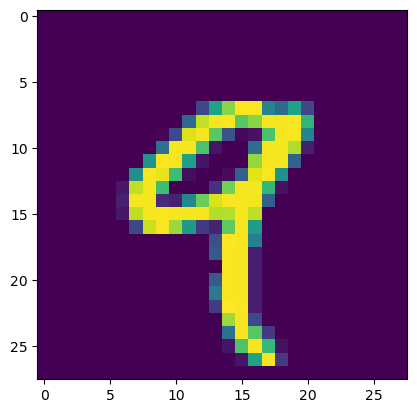

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[4])

In [10]:
xtrain[0].shape

(28, 28)

# Data Pre-processing

In [11]:
#reshape data to fit model
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,1)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,1)

print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [13]:
xtrain/=255
xtest/=255

In [14]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
#Convert class vectors to binary class matrices

ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [16]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Build CNN model

In [18]:
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
#output layer
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                        

In [20]:
#compile
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,
 metrics=['accuracy'] )

In [21]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,epochs=5,verbose=1,
 validation_data=(xtest,ytest))

Epoch 1/5
469/469 [==============================] - 151s 317ms/step - loss: 0.2485 - accuracy: 0.9262 - val_loss: 0.0794 - val_accuracy: 0.9768
Epoch 2/5
469/469 [==============================] - 146s 310ms/step - loss: 0.0773 - accuracy: 0.9767 - val_loss: 0.0519 - val_accuracy: 0.9837
Epoch 3/5
469/469 [==============================] - 144s 308ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 4/5
469/469 [==============================] - 145s 309ms/step - loss: 0.0442 - accuracy: 0.9867 - val_loss: 0.0514 - val_accuracy: 0.9835
Epoch 5/5
469/469 [==============================] - 144s 308ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0406 - val_accuracy: 0.9872


In [22]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test Accuracy:',score[1])

Test Loss: 0.040625251829624176

Test Accuracy: 0.9872000217437744


In [23]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

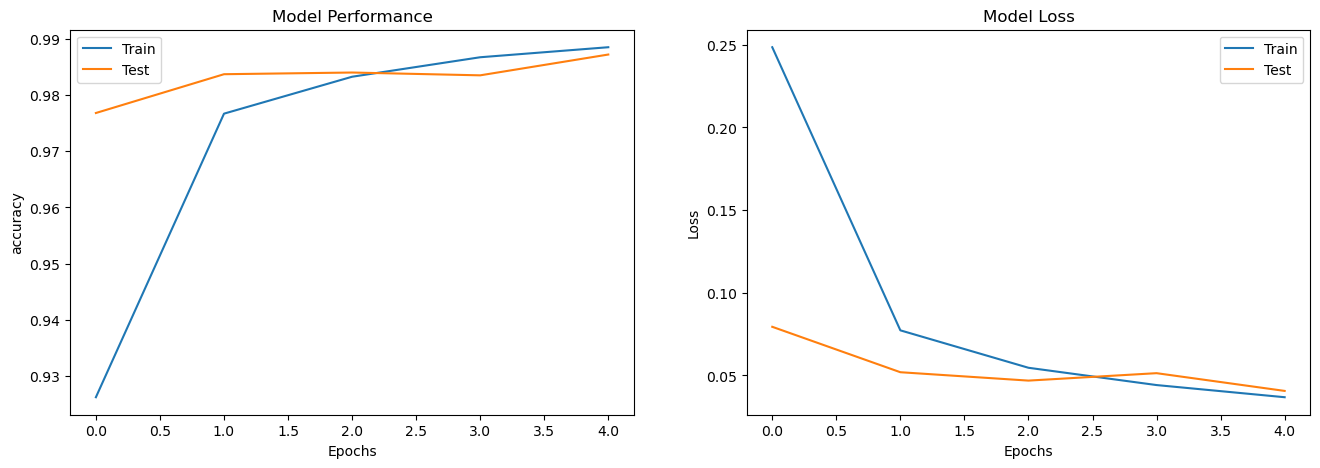

In [24]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
#plot training & validation accuracy values
ax1.plot(result.history['accuracy'])
ax1.plot(result.history['val_accuracy'])
ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('Epochs')
ax1.legend(['Train','Test'])
#plot training & validation loss values
ax2.plot(result.history['loss'])
ax2.plot(result.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend(['Train','Test'])

In [25]:
# predict first 4 images in the test set
ypred=model.predict(xtest[:4])
ypred

1/1 [==============================] - 0s 241ms/step


array([[1.3714804e-11, 8.9460358e-12, 7.8019760e-09, 4.3390432e-05,
        1.2130119e-12, 7.1933529e-11, 8.5754047e-19, 9.9995542e-01,
        1.3657212e-08, 1.2032489e-06],
       [1.9134150e-08, 8.8679212e-07, 9.9999845e-01, 2.0156374e-08,
        3.0841890e-13, 9.9617703e-10, 6.2090714e-07, 1.8031767e-12,
        2.0092578e-08, 7.2027605e-12],
       [2.0745397e-06, 9.9875927e-01, 2.0322252e-04, 2.1000238e-05,
        3.7334039e-04, 4.2792704e-05, 2.9411740e-06, 2.6236294e-04,
        3.2811638e-04, 4.8719544e-06],
       [9.9995470e-01, 2.2002962e-11, 2.1584665e-06, 1.3896829e-07,
        1.7532142e-07, 5.6100180e-07, 4.0520626e-05, 2.4176643e-07,
        2.7299174e-07, 1.2304449e-06]], dtype=float32)

In [26]:
# actual results for first 4 images in test set
ytest[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)